<a href="https://colab.research.google.com/github/Faraaztqureshi/DS-Unit-1-Sprint-2-Statistics/blob/master/Faraaz_Qureshi_007_DS10_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


# Confidence Interval: generate and numerically represent a confidence interval

In [0]:
## start by importing tools
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_1samp


In [2]:
## get the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-05 22:03:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-11-05 22:03:06 (123 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
## cleaning the data
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
## replacing values 
df = df.replace({'y': 1, 'n': 0})

In [5]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
## seperate into reps and dems
reps = df[df['party'] == 'republican']
dems = df[df['party'] == 'democrat']

In [7]:
reps.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
## when I inspect the head I notice the el-salvador-aid bill that has mean(.95)
## I want to run a confidence interval for sample means from republicans

In [0]:
## I need to generate some sample data
## I want to test that the mean for a random group of 25 republicans
## and how close their records be to what we exepect
data = reps['el-salvador-aid'].sample(n=25)

## I want to make sure my data is an array
data = np.array(data)

In [0]:
from scipy import stats
## calculate the mean of our sample data
data.mean()

## I want to put this into the function so I will save my mean as an array
mean = np.mean(data)

## determine n (sample size)
n = len(data)

## standard error
stderr = stats.sem(data)

## interval with 95% confidence level
confidence = 0.95
interval = stderr * stats.t.ppf((1 + confidence)/ 2.0, n-1)

In [0]:
## now that I have all my variables I can make the function like in lecture
def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return (mean, mean - interval, mean + interval)

In [13]:
confidence_interval(data, confidence=0.95)

(0.96, 0.8774440575348792, 1.0425559424651207)

In [14]:
reps['el-salvador-aid'].mean()

0.9515151515151515

# *Interpretation: Here is what my code is saying.  If we were to take a random sample of Republicans who voted on the el-salvador-aid bill, 95% of our samples means would be within the bounds of .877 and 1.04.  Only 5% of the time would we expect a sample mean outside those values. Due to a p value of 1.042 we fail to reject the null hypothesis that the means of these groups are the same.*

**Graphical Representation**

In [0]:
# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

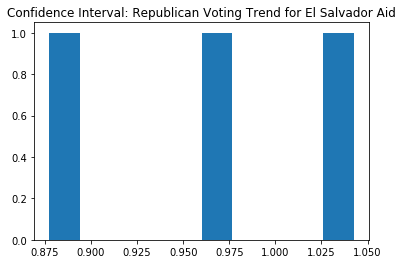

In [16]:

plt.hist(confidence_interval(data, confidence=0.95))

plt.title("Confidence Interval: Republican Voting Trend for El Salvador Aid")

plt.show()

# CHI SQUARE by hand with Numpy and Scipy

In [0]:
## import a dataset with categorical variables
## I am importing a dataset about education
df1 = pd.read_csv('xAPI-Edu-Data.csv')

In [0]:
## for the purpose of this task I just want to look at gender vs raised hands
df1 = df1[['gender', 'raisedhands']]

In [0]:
## now to encode m = 0 and f = 1
df1 = df1.replace({'M': 0, 'F': 1})

In [21]:
## so we have 305 males and 175 females
df1['gender'].value_counts()

0    305
1    175
Name: gender, dtype: int64

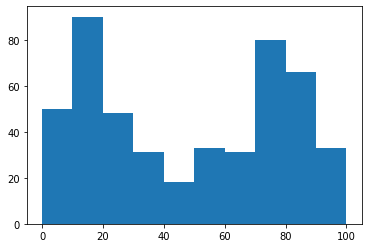

In [22]:
plt.hist(df1['raisedhands'])
plt.show()

In [0]:
cut_points = [0, 20, 40, 60, 80, 100]
labels = ["0 to 20", "21 to 40", "41 to 60", "61 to 80", "More than 80"]
df1['raisedhands'] = pd.cut(df1['raisedhands'], cut_points, labels=labels)

In [27]:
df1['raisedhands'].value_counts()

0 to 20         142
61 to 80        127
21 to 40         74
More than 80     71
41 to 60         57
Name: raisedhands, dtype: int64

In [0]:
table = pd.crosstab(df1['gender'], df1['raisedhands'], margins=True)

In [30]:
## Remember that 0 is male and 1 is female
table

raisedhands,0 to 20,21 to 40,41 to 60,61 to 80,More than 80,All
gender,,,,,,
0,104,49,31,75,38,297
1,38,25,26,52,33,174
All,142,74,57,127,71,471


In [51]:
## grab the values I'll be using to calculate
row_sums = table.iloc[0:2, :5].values
column_sums = table.iloc[2:, :5].values
print(row_sums)
print(column_sums)

[[104  49  31  75  38]
 [ 38  25  26  52  33]]
[[142  74  57 127  71]]


In [54]:
total = table.loc["All", "All"]
total

471

In [0]:
## use a function to go through the rows and give me expected values
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in column_sums:
    expectedval = column * row_sum/total
    expected_row.append(expectedval)
  expected.append(expected_row)

expected = np.array(expected)


In [0]:
## set up observed
observed = pd.crosstab(df1['gender'], df1['raisedhands']).values

In [0]:
## now we can use the formula since we have all the variables
q_chi_square = ((observed - expected) ** 2/(expected)).sum()

In [62]:
q_chi_square

3867.0657200841943

# Now using one line of code and Scipy

In [70]:
observed 

array([[104,  49,  31,  75,  38],
       [ 38,  25,  26,  52,  33]])

In [0]:
from scipy.stats import chisquare

In [73]:
chisquare(observed)

Power_divergenceResult(statistic=array([30.67605634,  7.78378378,  0.43859649,  4.16535433,  0.35211268]), pvalue=array([3.04904417e-08, 5.27172680e-03, 5.07800648e-01, 4.12587823e-02,
       5.52919625e-01]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)